### Load Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('bbc_data.csv.zip')

In [3]:
df.head()

,data,labels
0,Musicians to tackle US red tape Musicians gro...,entertainment
1,"U2s desire to be number one U2, who have won ...",entertainment
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment
3,Snicket tops US box office chart The film ada...,entertainment
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment


In [4]:
df.shape

(2225, 2)

#### Insights:
1. The dataset has text of document and label of that document.
2. Based of the text, this label has to be predicted.

### Exploratory Data Analysis (EDA)

In [6]:
df['labels'].value_counts()

labels
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    2225 non-null   object
 1   labels  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [8]:
print(df['data'].iloc[0])

Musicians to tackle US red tape  Musicians groups are to tackle US visa regulations which are blamed for hindering British acts chances of succeeding across the Atlantic.  A singer hoping to perform in the US can expect to pay $1,300 (xc2xa3680) simply for obtaining a visa. Groups including the Musicians Union are calling for an end to the "raw deal" faced by British performers. US acts are not faced with comparable expense and bureaucracy when visiting the UK for promotional purposes.  Nigel McCune from the Musicians Union said British musicians are "disadvantaged" compared to their US counterparts. A sponsor has to make a petition on their behalf, which is a form amounting to nearly 30 pages, while musicians face tougher regulations than athletes and journalists. "If you make a mistake on your form, you risk a five-year ban and thus the ability to further your career," says Mr McCune.  "The US is the worlds biggest music market, which means something has to be done about the creaky b

#### Insights:
1. The dataset does not have imbalance.
2. The text is raw and has to be preprocessed.

### Text Preprocessing

In [9]:
import spacy
import re

nlp = spacy.load("en_core_web_sm")

def preprocess_text(text: str) -> str:
    """
    Preprocess text by:
    - Lowercasing
    - Removing punctuation, numbers, special chars
    - Removing stopwords
    - Lemmatizing
    """
    
    text = text.lower()
    text = re.sub(r'[^a-z\s]', ' ', text)  
    
    doc = nlp(text)

    tokens = [token.lemma_ for token in doc if not token.is_stop and token.lemma_.strip() != '']

    return " ".join(tokens)


In [10]:
sample = """Musicians to tackle US red tape. 
Musicians groups are to tackle US visa regulations 
which are blamed for hindering British acts chances of succeeding across the Atlantic."""

print(preprocess_text(sample))

musician tackle red tape musician group tackle visa regulation blame hinder british act chance succeed atlantic


In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['label_num'] = le.fit_transform(df['labels'])

label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)

{'business': np.int64(0), 'entertainment': np.int64(1), 'politics': np.int64(2), 'sport': np.int64(3), 'tech': np.int64(4)}


In [12]:
df['clean_text'] = df['data'].apply(preprocess_text)

In [13]:
df.head()

,data,labels,label_num,clean_text
0,Musicians to tackle US red tape Musicians gro...,entertainment,1,musician tackle red tape musician group tackle...
1,"U2s desire to be number one U2, who have won ...",entertainment,1,u s desire number u win prestigious grammy awa...
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment,1,rocker doherty stage fight rock singer pete do...
3,Snicket tops US box office chart The film ada...,entertainment,1,snicket top box office chart film adaptation l...
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment,1,ocean raid box office ocean crime caper sequel...


In [14]:
print(df['clean_text'].iloc[0])

musician tackle red tape musician group tackle visa regulation blame hinder british act chance succeed atlantic singer hope perform expect pay xc xa simply obtain visa group include musician union call end raw deal face british performer act face comparable expense bureaucracy visit uk promotional purpose nigel mccune musician union say british musician disadvantaged compare counterpart sponsor petition behalf form amount nearly page musician face tough regulation athlete journalist mistake form risk year ban ability career say mr mccune world big music market mean creaky bureaucracy say mr mccune current situation prevent british act maintain momentum develop add musician union stance endorse music manager forum mmf british artist face uphill struggle succeed thank tough visa requirement see impractical mmfs general secretary james seller say imagine orchestra orkney member travel london visa process market see holy grail benchmark success go fight important market like europe india c

### Feature Extraction

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer() 
X = tfidf.fit_transform(df['clean_text'])
y = df['label_num']

In [16]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 292392 stored elements and shape (2225, 22649)>

### Train-Test Split

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [21]:
X_train.shape

(1780, 22649)

### Model Training

In [31]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("NB Accuracy:", nb.score(X_test, y_test))

NB Accuracy: 0.9685393258426966


In [27]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("LR Accuracy:", lr.score(X_test, y_test))

LR Accuracy: 0.9797752808988764


In [28]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", svm.score(X_test, y_test))

SVM Accuracy: 0.9865168539325843


In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
print("RF Accuracy:", rf.score(X_test, y_test))

RF Accuracy: 0.9730337078651685


In [23]:
y_pred = nb.predict(X_test)

### Model Evaluation 

SVM Accuracy: 0.9865168539325843

Classification Report:
                precision    recall  f1-score   support

     business       0.98      0.99      0.99       102
entertainment       0.96      1.00      0.98        77
     politics       0.99      0.98      0.98        84
        sport       1.00      1.00      1.00       102
         tech       1.00      0.96      0.98        80

     accuracy                           0.99       445
    macro avg       0.99      0.99      0.99       445
 weighted avg       0.99      0.99      0.99       445



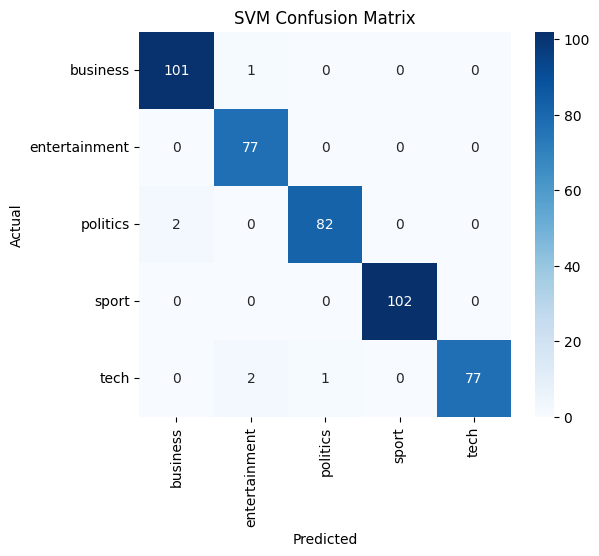

In [35]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

svm = LinearSVC()
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

print("\nClassification Report:\n", 
      classification_report(y_test, y_pred_svm, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()

In [36]:
import joblib

model = joblib.load("bbc_svm_model.pkl")
vectorizer = joblib.load("tfidf_vectorizer.pkl")

1.5.2


In [37]:
import joblib

joblib.dump(svm, "svm_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']

In [39]:
joblib.dump(le, "label_encoder.pkl")

['label_encoder.pkl']